In [724]:

%load_ext autoreload
%autoreload 2
import glob
#from cleaning_data import cleaning_match
import pandas as pd
from feature_extraction import extracting_total_outs_per_batsman, runs_per_season, all_features, player_info, extracting_age
from cleaning_data import concating_dataframes, cleaning_replacing
from train_test import train_and_test

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [600]:
all_df =concating_dataframes('../../capstone_project/ipl_csv/Data/trial/')

In [16]:
type(all_df.season.unique()[0])

numpy.int64

In [233]:
train = all_df[(all_df.season !=2017)]

test = all_df[all_df.season == 2017]

In [229]:
train.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [234]:
train_with_features = all_features(train)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [625]:
train, test = train_and_test(2015, 2016)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [725]:
scalar = StandardScaler()

In [738]:
X_train = scalar.fit_transform(X_train)

In [733]:
X_test = scalar.fit_transform(X_test)

In [699]:
X_train = train.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)
y_test = test['runs_scored'].values

In [634]:
#r = RandomForestRegressor(n_estimators=10000, oob_score=True, n_jobs=-1,min_samples_leaf=30)

In [641]:
rf = RandomForestRegressor(n_estimators=10000, oob_score=True, n_jobs=-1,min_samples_leaf=30)

In [642]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=30, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [643]:
y_pred = rf.predict(X_test)

In [644]:
rf.score(X_test, y_test)

-1.5027583060979937

In [645]:
mean_squared_error(y_pred, y_test)

66835.24575854026

In [359]:
X_test.columns

Index(['player_id', 'Australia', 'Bangladesh', 'England', 'India',
       'Netherlands', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
       'West Indies', 'Zimbabwea', 'season', 'ball', 'matches', 'total_outs',
       'highest_score', 'Average', 'strike_rate', 'Average_1st_innings',
       'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'age'],
      dtype='object')

In [360]:
X_test.season = X_test.season.astype(int)

In [361]:
X_test.age = X_test.age.astype(int)

In [378]:
Average = X_train.Average.values.mean()

Average_1 = X_train.Average_1st_innings.values.mean()
Average_2 = X_train.Average_2nd_innings.values.mean()

X_test.Average_1st_innings = X_test.Average_1st_innings.replace('', Average_1)
X_test.Average_2nd_innings = X_test.Average_2nd_innings.replace('', Average_2)


In [379]:
X_test.Average = X_test.Average.replace('', Average)

In [382]:
X_test.Average_1st_innings = X_test.Average_1st_innings.replace('', Average_1)
X_test.Average_2nd_innings= X_test.Average_2nd_innings.replace('', Average_2)

In [ ]:
X_test.replace('', X_test)

In [429]:
def replace(df):
    cols = df.columns
    for col in cols:
        col_avg = train[col].values.mean()
        df[col] = df[col].replace('', col_avg)
    return test


In [659]:
len(test.columns)

34

In [432]:
test = test.drop(['batsman_striker', 'Batting_hand', 'Bowling_skill', 'DOB'], axis=1)

In [433]:
test = replace(test)

In [408]:
cols = ['ball', 'matches', 'total_outs',
       'highest_score', 'Average', 'strike_rate', 'Average_1st_innings',
       'strike_rate_1st_innings','strike_rate_1st_innings','Average_2nd_innings','strike_rate_2nd_innings','toss_win_count','30+','50+','75+','number_of_zeros']

In [407]:
X_test.columns

Index(['player_id', 'Australia', 'Bangladesh', 'England', 'India',
       'Netherlands', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
       'West Indies', 'Zimbabwea', 'season', 'ball', 'matches', 'total_outs',
       'highest_score', 'Average', 'strike_rate', 'Average_1st_innings',
       'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'age'],
      dtype='object')

In [409]:
X_test = replace(cols=cols)

In [402]:
for value in X_test.values:
    if type(value) == str:
        print(True)

In [467]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pa

In [ ]:
RandomForestRegressor([n_estimators=100,1000,10000,100000] )

In [470]:
gs = GridSearchCV(RandomForestRegressor(n_estimators=100, ), cv=5)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [491]:
from sklearn.ensemble import GradientBoostingRegressor

In [532]:
gb = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf= 3,n_estimators=50000 )

In [734]:
gboostiii = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000, max_features='sqrt' )

gboostiii.fit(X_train, y_train)

g_predictiii = gboosti.predict(X_test)

gboostiii.score(X_test, y_test)

-0.07402216791582883

In [735]:
mean_squared_error(y_test, g_predictiii)

51391.41297061636

In [701]:
g_t_predici = gboosti.predict(X_train)

In [721]:
g_t_predici

array([ 81.99977542,   3.99982074, 148.99993642, ...,  86.00001639,
        20.00068324,   6.00000749])

In [692]:
mean_squared_error(y_train, g_t_predic)

9.99825577855156e-08

In [657]:
mean_squared_error(y_test, y_pred)

66835.24575854026

In [651]:
gb.feature_importances_

array([0.03978492, 0.01896915, 0.05826849, 0.01258677, 0.01535818,
       0.02747074, 0.04138922, 0.05777069, 0.03470575, 0.03761355,
       0.03533598, 0.03481547, 0.01286734, 0.00444419, 0.00285782,
       0.0010618 , 0.00629507, 0.00199457, 0.00016554, 0.0004838 ,
       0.00640046, 0.00054917, 0.00820863, 0.00027016, 0.00095193,
       0.00100541, 0.001134  , 0.        , 0.02708116])

In [502]:
import matplotlib.pyplot as plt

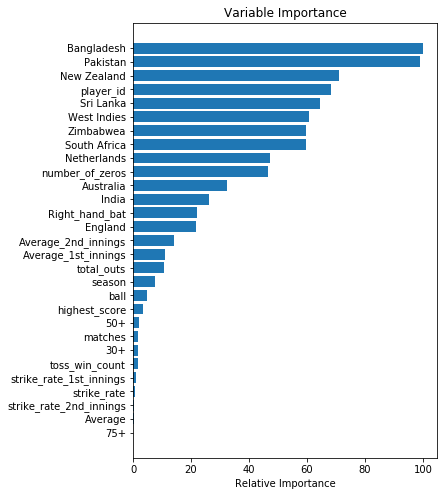

In [652]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
GridSearchCV

In [520]:
param_grid = {'learning_rate': [0.01,0.1, 0.05, 0.02],
                  'max_depth': [2, 3],
                  'min_samples_leaf': [3, 5],
              'n_estimators':[1000,5000,10000,50000,100000]
                  }

In [521]:
param_grid

{'learning_rate': [0.01, 0.1, 0.05, 0.02],
 'max_depth': [2, 3],
 'min_samples_leaf': [3, 5],
 'n_estimators': [1000, 5000, 10000, 50000, 100000]}

In [522]:
gs_cv = GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=2).fit(X_train, y_train)

In [523]:
gs_cv.best_score_

0.9946892779541024

In [524]:
gs_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'n_estimators': 50000}

In [530]:
from sklearn.model_selection import KFold


In [546]:
train_1, test_1 = train_and_test(2012, 2013)
train_2, test_2 = train_and_test(2013, 2014)
train_3, test_3 = train_and_test(2014, 2015)
train_4, test_4 = train_and_test(2015, 2016)
train_5, test_5 = train_and_test(2016, 2017)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [531]:
KFold

sklearn.model_selection._split.KFold

In [537]:
from sklearn.cross_validation import cross_val_score, cross_val_predict

In [539]:
cross_val_score(gb,X_train, y_train , cv = 6)

array([0.99753626, 0.9990278 , 0.9982458 , 0.99709274, 0.99747918,
       0.98244739])

In [540]:
grad = GradientBoostingRegressor(learning_rate = 0.05, max_depth= 3, min_samples_leaf= 3, n_estimators= 50000)

In [550]:
X_train_1 = train_1.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_1 = train_1['runs_scored']


X_test_1 = test_1.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_1 = test_1['runs_scored']

In [551]:
X_train_2 = train_2.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_2 = train_2['runs_scored']


X_test_2 = test_2.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_2 = test_2['runs_scored']

In [552]:
X_train_3 = train_3.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_3 = train_3['runs_scored']


X_test_3 = test_3.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_3 = test_3['runs_scored']

In [553]:
X_train_4 = train_4.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_4 = train_4['runs_scored']


X_test_4 = test_4.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_4 = test_4['runs_scored']

In [554]:
X_train_5 = train_5.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_5 = train_5['runs_scored']


X_test_5 = test_5.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_5 = test_5['runs_scored']

In [564]:
grad.fit(X_train_1, y_train_1)

y_predict_1 = grad.predict(X_test_1)

score_1 = grad.score(X_test_1, y_test_1)

mse_1 = mean_squared_error( y_test_1, y_predict_1)

print('MSE:{}'.format(mse_1))
print('Score:{}'.format(score_1))

MSE:48687.126376116736
Score:-0.9895065309634673


In [565]:
grad.fit(X_train_2, y_train_2)

y_predict_2 = grad.predict(X_test_2)

score_2 = grad.score(X_test_2, y_test_2)

mse_2 = mean_squared_error( y_test_2, y_predict_2)

print('MSE:{}'.format(mse_2))
print('Score:{}'.format(score_2))

MSE:56505.47963250687
Score:-1.0904615369122612


In [567]:
grad.fit(X_train_3, y_train_3)

y_predict_3 = grad.predict(X_test_3)

score_3 = grad.score(X_test_3, y_test_3)

mse_3 = mean_squared_error( y_test_3, y_predict_3)

print('MSE:{}'.format(mse_3))
print('Score:{}'.format(score_3))

MSE:58127.37607869323
Score:-1.062760745701821


In [568]:
grad.fit(X_train_4, y_train_4)

y_predict_4 = grad.predict(X_test_4)

score_4 = grad.score(X_test_4, y_test_4)

mse_4 = mean_squared_error( y_test_4, y_predict_4)

print('MSE:{}'.format(mse_4))
print('Score:{}'.format(score_4))

MSE:54361.68199762195
Score:-0.9590076618213701


In [573]:
#from sklearn.ensemble import partial_dependence 


In [575]:
X_train.head()

,player_id,season,ball,matches,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,...,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,age
1332,437,2008,3,2,2.0,4,2.00,133.33,4.00,200.00,...,0,1,0,0,0,0,0,0,0,24
119,37,2008,142,10,38.0,45,5.42,145.07,7.06,137.93,...,0,1,0,0,0,0,0,0,0,25
1168,376,2008,60,7,20.0,34,3.50,116.67,2.55,93.33,...,0,0,0,0,0,0,0,0,0,39
907,297,2008,4,3,12.0,3,0.17,50.00,0.33,66.67,...,0,1,0,0,0,0,0,0,0,22
486,162,2008,24,3,3.0,22,7.67,95.83,1.00,33.33,...,0,1,0,0,0,0,0,0,0,32


In [576]:
len(X_train.columns)

29

In [589]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

In [596]:
train.

Index(['batsman_striker', 'player_id', 'season', 'ball', 'matches',
       'runs_scored', 'total_outs', 'highest_score', 'Average', 'strike_rate',
       'Average_1st_innings', 'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'DOB', 'Batting_hand', 'Bowling_skill', 'Australia',
       'Bangladesh', 'England', 'India', 'Netherlands', 'New Zealand',
       'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwea',
       'age'],
      dtype='object')

In [ ]:
lambda x:x.startswith('Right')

In [615]:
l = []
for value in player.Batting_hand.values:
    if value.startswith('Right'):
        l.append('Right_hand_bat')
    else:
        l.append('Left_hand_bat')

In [619]:
player['Batting_hand']= l

In [621]:
player.Batting_hand.unique()

array(['Left_hand_bat', 'Right_hand_bat'], dtype=object)

In [623]:
pd.get_dummies(player.Batting_hand, drop_first=True)

,Right_hand_bat
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [666]:
train.columns

Index(['batsman_striker', 'player_id', 'season', 'ball', 'matches',
       'runs_scored', 'total_outs', 'highest_score', 'Average', 'strike_rate',
       'Average_1st_innings', 'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'DOB', 'Bowling_skill', 'Australia', 'Bangladesh',
       'England', 'India', 'Netherlands', 'New Zealand', 'Pakistan',
       'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwea',
       'Right_hand_bat', 'age'],
      dtype='object')

In [681]:
X_train = train.drop(['runs_scored','season','matches','Average','total_outs','ball', 'batsman_striker', 'Bowling_skill','30+','toss_win_count','50+','75+','strike_rate','strike_rate_2nd_innings','strike_rate_1st_innings', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored','season','matches','Average','total_outs','ball', 'batsman_striker', 'Bowling_skill','30+','toss_win_count','50+','75+','strike_rate','strike_rate_2nd_innings','strike_rate_1st_innings', 'DOB'], axis=1)

y_test = test['runs_scored'].values

In [682]:
len(X_train.columns)

18

In [683]:
gb_feat = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000, max_features='sqrt' )

gb_feat.fit(X_train, y_train)

gb_feat_predict = gb_feat.predict(X_test)

gb_feat.score(y_test, X_test)

-1.4513428871991416

In [687]:
gb_feat.score(X_test, y_test)

-1.4513428871991416

In [684]:
mean_squared_error(y_tes, gb_feat_predict)

65462.21579016085

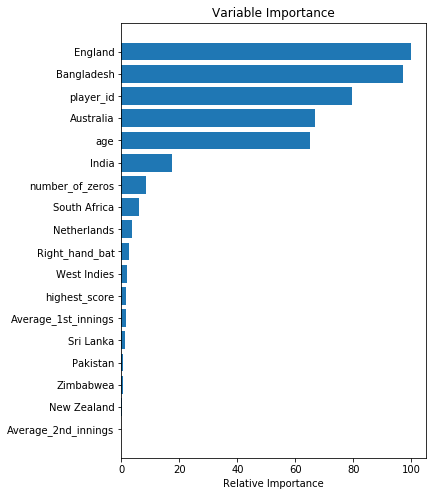

In [685]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = gb_feat.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [709]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (764,) and (1364,)

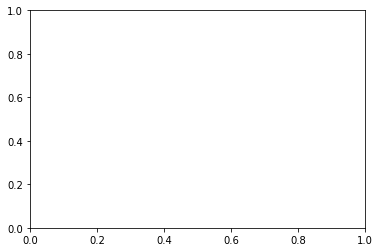

In [712]:
plt.plot(y_test, g_t_predic, '*')

In [716]:
len(g_t_predici)

1364

In [717]:
len(y_test)

764

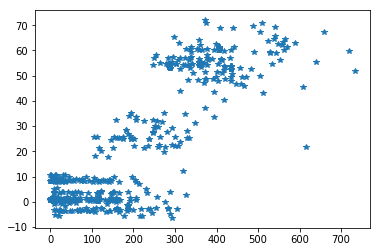

In [736]:
plt.plot(y_test,g_predictiii, '*')

In [718]:
len(g_predicti)

764

In [706]:
len(y_test)

764